# Multiple Regression using the basic model

In [6]:
import pandas as pd
import statsmodels.formula.api as smf

album2 = pd.read_csv("data/Album Sales 2.dat",sep="\t")
album2.head()

,adverts,sales,airplay,attract
0,10.256,330,43,10
1,985.685,120,28,7
2,1445.563,360,35,7
3,1188.193,270,33,7
4,574.513,220,44,5


### The First Model

In [8]:
model2 = smf.ols("sales ~ adverts", data=album2)
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     99.59
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           2.94e-19
Time:                        13:41:08   Log-Likelihood:                -1120.7
No. Observations:                 200   AIC:                             2245.
Df Residuals:                     198   BIC:                             2252.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    134.1399      7.537     17.799      0.000     119.278     149.002
adverts        0.0961      0.010      9.979      0.000       0.077       0.115
==============================================================================
Omnibus:                        4.961   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.556
Skew:                           0.339   Prob(JB):                        0.102
Kurtosis:                       3.294   Cond. No.                     1.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The Second Model

In [12]:
model3 = smf.ols("sales ~ adverts + airplay + attract", data=album2)
fit3 = model3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     129.5
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           2.88e-46
Time:                        13:42:49   Log-Likelihood:                -1052.2
No. Observations:                 200   AIC:                             2112.
Df Residuals:                     196   BIC:                             2126.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.6130     17.350     -1.534      0.127     -60.830       7.604
adverts        0.0849      0.007     12.261      0.000       0.071       0.099
airplay        3.3674      0.278     12.123      0.000       2.820       3.915
attract       11.0863      2.438      4.548      0.000       6.279      15.894
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.351
Skew:                          -0.073   Prob(JB):                        0.839
Kurtosis:                       3.144   Cond. No.                     4.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

== The Standardized Model

calculate **standardized beta estimates**

In [22]:
from scipy.stats.mstats import zscore
model4 = smf.ols("zscore(sales) ~ zscore(adverts) + zscore(airplay) + zscore(attract)", data=album2)
fit4 = model4.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          zscore(sales)   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     129.5
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           2.88e-46
Time:                        14:44:52   Log-Likelihood:                -174.52
No. Observations:                 200   AIC:                             357.0
Df Residuals:                     196   BIC:                             370.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.665e-16      0.041   4.03e-15      1.000      -0.082       0.082
zscore(adverts)     0.5108      0.042     12.261      0.000       0.429       0.593
zscore(airplay)     0.5120      0.042     12.123      0.000       0.429       0.595
zscore(attract)     0.1917      0.042      4.548      0.000       0.109       0.275
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.351
Skew:                          -0.073   Prob(JB):                        0.839
Kurtosis:                       3.144   Cond. No.                         1.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Comparing two models using F-ratio(ANOVA)

In [23]:
from statsmodels.stats.anova import anova_lm
anova_lm(fit2,fit3)

d:\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
d:\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
d:\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,198.0,862264.167468,0.0,NaN,NaN,NaN
1,196.0,434574.581730,2.0,427689.585738,96.447379,6.879395e-30


### Casewise diagnostics (Residual and influence statistics)

In [26]:
influence = fit3.get_influence()
influence.summary_frame()

,dfb_Intercept,dfb_adverts,dfb_airplay,dfb_attract,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.315539,-0.242346,0.157739,0.353292,0.058704,2.177404,0.047191,0.484578,2.198596,0.489294
1,0.012593,-0.126374,0.009421,-0.018683,0.010889,-2.323083,0.008007,-0.208705,-2.349724,-0.211098
2,-0.038068,0.174929,0.046574,-0.005385,0.011401,1.468802,0.020700,0.213548,1.473180,0.214184
3,-0.002576,0.012163,0.003444,0.000129,0.000072,0.150116,0.012561,0.016931,0.149741,0.016889
4,-0.008583,0.001088,-0.014254,0.013554,0.000103,-0.123798,0.026065,-0.020253,-0.123487,-0.020202
...,...,...,...,...,...,...,...,...,...,...
195,0.000423,-0.024084,0.008180,-0.005901,0.000548,-0.551209,0.007159,-0.046807,-0.550227,-0.046723
196,0.103982,0.083764,-0.127903,-0.047769,0.009916,1.658239,0.014219,0.199154,1.665730,0.200054
197,0.020206,0.015677,0.025375,-0.028588,0.000816,0.589794,0.009297,0.057134,0.588810,0.057039
198,-0.002783,0.010558,-0.009404,0.005674,0.000060,0.076973,0.038855,0.015476,0.076778,0.015437


In [66]:
album2["residuals"]=influence.resid
album2["standardized.residuals"]=zscore(influence.resid)
album2["studentized.residuals"]=influence.resid_studentized
album2["cooks.distance"]=influence.cooks_distance[0]
album2["dfbeta"]=influence.dfbeta.tolist()
album2["dffits"],dummy=influence.dffits
album2["leverage"]=influence.hat_diag_factor
album2["covariance.ratios"]=influence.cov_ratio

album2.head()

,adverts,sales,airplay,attract,residuals,standardized.residuals,studentized.residuals,cooks.distance,dfbeta,dffits,leverage,covariance.ratios,large.residual
0,10.256,330,43,10,100.079745,2.146985,2.177404,0.058704,"[-5.421827067068946, -0.0016615914720049113, 0...",0.489294,0.049528,0.971275,True
1,985.685,120,28,7,-108.948992,-2.337255,-2.323083,0.010889,"[0.2160170176078573, -0.0008649689832182228, 0...",-0.211098,0.008071,0.920183,True
2,1445.563,360,35,7,68.442368,1.468277,1.468802,0.011401,"[-0.6585179696575061, 0.0012074358111014566, 0...",0.214184,0.021138,0.997110,True
3,1188.193,270,33,7,7.024026,0.150685,0.150116,0.000072,"[-0.04480868853298503, 8.4417001623871e-05, 0....",0.016889,0.012721,1.033180,True
4,574.513,220,44,5,-5.752861,-0.123415,-0.123798,0.000103,"[-0.14928350490530562, 7.552859667553369e-06, ...",-0.020202,0.026763,1.047660,True


## Finding outliers

In [69]:
album2["large.residual"] = (album2["standardized.residuals"] > 2) | (album2["standardized.residuals"] < -2) 
sum(album2["large.residual"])

0       True
1       True
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199     True
Name: large.residual, Length: 200, dtype: bool

In [70]:
album2[album2["large.residual"]]

,adverts,sales,airplay,attract,residuals,standardized.residuals,studentized.residuals,cooks.distance,dfbeta,dffits,leverage,covariance.ratios,large.residual
0,10.256,330,43,10,100.079745,2.146985,2.177404,0.058704,"[-5.421827067068946, -0.0016615914720049113, 0...",0.489294,0.049528,0.971275,True
1,985.685,120,28,7,-108.948992,-2.337255,-2.323083,0.010889,"[0.2160170176078573, -0.0008649689832182228, 0...",-0.211098,0.008071,0.920183,True
9,174.093,300,40,7,99.533751,2.135272,2.130289,0.017756,"[-0.2159709598687769, -0.0010709505814070347, ...",0.268958,0.015651,0.943920,True
46,102.568,40,25,8,-114.969819,-2.466418,-2.460996,0.024115,"[1.137816354148189, 0.0013393286392432563, 0.0...",-0.314688,0.015927,0.914580,True
51,405.913,190,12,4,97.402661,2.089554,2.099446,0.033159,"[6.069240790579357, -0.0001976726876808388, -0...",0.367418,0.030092,0.959953,True
54,1542.329,190,33,8,-114.123081,-2.448253,-2.455913,0.040416,"[2.9843774732927635, -0.0022309557278315933, -...",-0.407364,0.026803,0.924858,True
60,579.321,300,30,7,98.810295,2.119752,2.104079,0.005948,"[0.01408235045907702, -0.0001055773258054199, ...",0.155625,0.005374,0.936538,True
67,56.895,70,37,7,-110.415642,-2.368718,-2.363549,0.022289,"[-0.04813272261194612, 0.0014466228453252905, ...",-0.302164,0.015960,0.923698,True
99,1000.000,250,5,7,97.286661,2.087066,2.095399,0.031364,"[1.0513491554135754, 0.0009966247697900527, -0...",0.357318,0.028573,0.958877,True
163,9.104,120,53,8,-121.324049,-2.602734,-2.628814,0.070766,"[3.07235914135849, 0.0019761695806608803, -0.1...",-0.540289,0.040960,0.920373,True


### Accessing the assumption of independence (using Durbin-Waston test)

In [71]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(fit3.resid)

1.9498189295800619

D-W statistic 0 means perfect positive autocorrection , 2 no autocorrelation 4, perfect negative autocorrection

### assessing the assumption of no multicollinearity

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIFs=pd.Series([variance_inflation_factor(fit3.model.exog, i) 
               for i in [1,2,3]])
VIFs.index=[fit3.model.exog_names[i] for i in [1,2,3]]
VIFs

adverts    1.014593
airplay    1.042504
attract    1.038455
dtype: float64

In [87]:
VIFs.max(), VIFs.mean()

(1.0425042766818937, 1.0318504825952806)

the lagest VIF is greater than 10 then there is cause for concern
the average VIF is substantially greater than 1 then the regression may be biased

In [86]:
fit3.model.exog_names

['Intercept', 'adverts', 'airplay', 'attract']

### plots of residuals

In [90]:
import matplotlib.pyplot as plt

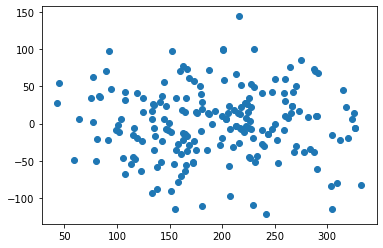

In [93]:
plt.plot(fit3.fittedvalues,fit3.resid,'o')

(array([ 6.,  8., 22., 32., 50., 43., 22., 11.,  5.,  1.]),
 array([-2.62881409, -2.05659938, -1.48438468, -0.91216997, -0.33995527,
         0.23225944,  0.80447414,  1.37668885,  1.94890356,  2.52111826,
         3.09333297]),
 <a list of 10 Patch objects>)

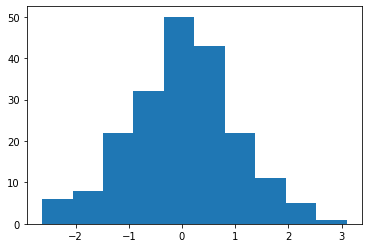

In [96]:
plt.hist(album2["studentized.residuals"])